## Galaxies in Illustris

Above, we were looking at star particles in simulated galaxies, similar to how we looked at stars in the Milky Way using Gaia data. We can instead look at many galaxies' overall properties, similar to how we looked at galaxies in Galaxy Zoo. We can look at some of the fully evolved galaxies in IllustrisTNG by examining the Illustris_galaxies file in the Data folder.

In [5]:
# read in the data
import pandas as pd 

data_gal = pd.read_csv('../Data/Illustris_galaxies.csv')

In [7]:
# display the data set
data_gal

,Galaxy ID,Stellar Mass [Mo],g band,r band,Probability is spiral
0,0,3.565573e+12,-23.256830,-24.071047,0.285813
1,1,5.376783e+11,-21.941610,-22.712160,0.817303
2,2,6.034437e+11,-22.199574,-22.951138,0.941455
3,3,1.650696e+11,-21.828701,-22.411537,0.998825
4,4,1.283022e+11,-20.685863,-21.426640,0.113466
...,...,...,...,...,...
12530,704187,5.030724e+09,-17.602875,-18.358276,0.411240
12531,719337,6.327700e+09,-18.095821,-18.824528,0.607696
12532,727485,5.224962e+09,-17.727982,-18.471638,0.475961
12533,738596,3.874592e+09,-17.392363,-18.134193,0.542526


**How many rows are there?** This represents the number of simulated galaxies we are looking at.

**Answer:** 12,535

**How many columns are there?** This represents the number measurements we have for each simulated galaxy.

**Answer:** 5

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID | numerical name of the galaxy | no unit
| Stellar Mass [Mo] | mass of all the stars in the galaxy | Solar Mass
| g band | brightness in g filter | mag
| r band | brightness in r filter | mag
| Probability is spiral | probability that a galaxy is a spiral | no unit (multiply by 100 to get a percent)

In [10]:
# create two boolean arrays for if a galaxy is a spiral galaxy or an elliptical galaxy
# use the same probability cut off that we did with the galaxy zoo
# you can assume a galaxy is elliptical if it is is less than 20% chance a spiral galaxy

spiral = data_gal['Probability is spiral'] > 0.8
elliptical = data_gal['Probability is spiral'] < 0.2

**What percentage of these galaxies are spirals?**

**Answer:** 26.18%

**What percentage of these galaxies are ellipticals?**

**Answer:** 11.76%

In [13]:
print('The percentage of spiral galaxies is', round(sum(spiral)/len(spiral) * 100,2), '%')
print('The percentage of elliptical galaxies is', round(sum(elliptical)/len(spiral) * 100,2), '%')

The percentage of spiral galaxies is 26.18 %
The percentage of elliptical galaxies is 11.76 %


**How do these percentages compare to the ones you found in the Galaxy Zoo data?**

**Answer:** They are fairly similar!

The mean color of spiral galaxies is 0.45
The mean color of elliptical galaxies is 0.75

The standard deviation of the color of spiral galaxies is 0.11
The standard deviation of the color of elliptical galaxies is 0.09


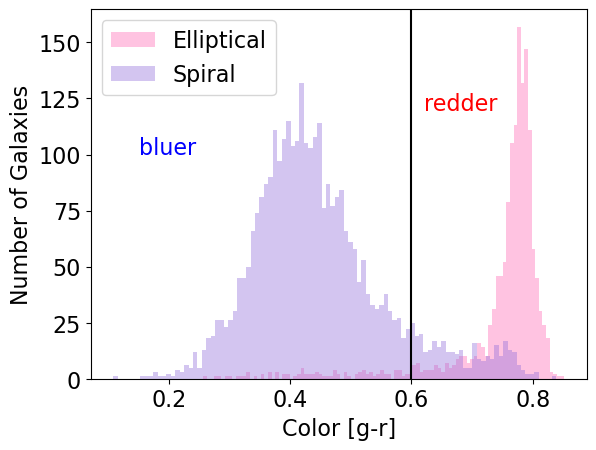

In [21]:
# create a single plot showing histograms of the colors of the two types of galaxies 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', **{'family':'sans-serif', 'size':16}) 
import numpy as np

# grab the columns we want
g_gal = data_gal['g band']
r_gal = data_gal['r band']

# calculate color
color_gal = g_gal - r_gal

# separate into spiral and elliptical
spiral_color = color_gal[spiral]
elliptical_color = color_gal[elliptical]

# create one histogram with elliptical and spiral galaxies on it
plt.hist(elliptical_color, bins=100, color='hotpink', alpha=.4, label='Elliptical')
plt.hist(spiral_color, bins=100, color='mediumpurple', alpha=.4, label='Spiral')
plt.axvline(0.6, color='black')
plt.annotate('bluer', (0.15, 100), color='blue', fontsize=16)
plt.annotate('redder', (.62, 120), color='red', fontsize=16)
plt.xlabel('Color [g-r]')
plt.ylabel('Number of Galaxies')
plt.legend()

# statistics
print('The mean color of spiral galaxies is', round(np.mean(spiral_color), 2))
print('The mean color of elliptical galaxies is', round(np.mean(elliptical_color), 2))
print('')
print('The standard deviation of the color of spiral galaxies is', round(np.std(spiral_color), 2))
print('The standard deviation of the color of elliptical galaxies is', round(np.std(elliptical_color), 2))

**Are your results consistent with what you found in Galaxy Zoo?**

**Answer:** Yes! The spiral galaxies have a bluer mean and greater spread than the elliptical galaxies. The means and standard deviations for spiral/ellipticals are very similar/the same between the two datasets.

## Mergers

So far, we have confirmed that in at least some ways, the simulated galaxies behave like observed ones! Cool, but let's learn something new! I said that we can use galaxy simulations to learn about mergers. Let's do that! Read in the mergers files and check out what it contains. 

In [25]:
# read in the file
data_merg = pd.read_csv('../Data/mergers.csv')

In [27]:
# examine the data
data_merg

,Galaxy ID,Time Since Last Major Merger [Gyr],Number of Major Mergers,Numbber of Minor Mergers
0,0,5.740040,8,16
1,1,3.956615,9,5
2,2,0.799699,3,4
3,3,4.126383,7,5
4,4,6.980874,5,7
...,...,...,...,...
12530,704187,12.554805,3,2
12531,719337,9.462953,1,2
12532,727485,10.228946,7,1
12533,738596,11.317041,3,2


**How many rows are there?** This represents the number of simulated galaxies we are looking at.

**Answer:** 12,535 (same as the one above because they both have the same galaxies)

**How many columns are there?** This represents the number measurements we have for each simulated galaxy.

**Answer:** 4

**Fill in the rows for each corresponding column**

| Column Header | Definition | Unit |
| :- | :- | :- |
| Galaxy ID | numerical name of the galaxy | no unit
| Time Since Last Major Merger [Gyr] | how long ago the last major merger happened  | Gyr (billions of years)
| Number of Major Mergers | number of large mergers the galaxy has had | no unit
| Number of Minor Mergers | number of small mergers the galaxy has had | no unit

# Deliverable

Explore the galaxy data you have in this notebook to make at least one plot that tells us something we haven't explored! Be ready to present. You might want to include statistics.

In [31]:
# explore the data and make a plot below!

merg_time = data_merg['Time Since Last Major Merger [Gyr]']
num_maj = data_merg['Number of Major Mergers']
num_min = data_merg['Numbber of Minor Mergers']
mass = data_gal['Stellar Mass [Mo]']


**According to your graph set up...**

**What is the independent variable?**

**Answer:**


**What is the dependent variable?**

**Answer:**


**What could a control variable be?**

**Answer:**

**What shapes or trends do you see in the data?**

**Answer:**

**What could this mean physically/astronomically?**

**Answer:**

**What further questions does this raise?**

**Answer:**

## Reflection

Write down some notes in your lab notebook about what you've learned in this unit about simulated galaxies. Be sure to include some astronomy and some coding. 